In [1]:
#importing the required files for data pre-processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"D:\Masai School\Machine Learning\Churn_Modelling - Train.csv")
test_df = pd.read_csv(r"D:\Masai School\Machine Learning\Churn_Modelling - Test.csv")

In [3]:
train_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
test_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15575492,Kennedy,828,France,Female,41,7,0.00,2,1,0,171378.77,0
1,2,15591607,Fernie,770,France,Male,24,9,101827.07,1,1,0,167256.35,0
2,3,15740404,He,758,France,Female,34,3,0.00,2,1,1,124226.16,0
3,4,15718369,Kaodilinakachukwu,795,Germany,Female,33,9,130862.43,1,1,1,114935.21,0
4,5,15677871,Cocci,687,France,Male,38,9,122570.87,1,1,1,35608.88,0


In [5]:
#cleaning the data in both the datasets:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8194 non-null   int64  
 1   CustomerId       8194 non-null   int64  
 2   Surname          8193 non-null   object 
 3   CreditScore      8194 non-null   int64  
 4   Geography        8194 non-null   object 
 5   Gender           8193 non-null   object 
 6   Age              8194 non-null   int64  
 7   Tenure           8194 non-null   int64  
 8   Balance          8192 non-null   float64
 9   NumOfProducts    8194 non-null   int64  
 10  HasCrCard        8194 non-null   int64  
 11  IsActiveMember   8194 non-null   int64  
 12  EstimatedSalary  8194 non-null   float64
 13  Exited           8194 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 896.3+ KB


In [9]:
#nulls found in balance, gender and surname:
train_df['Balance'].value_counts()

0.00         2968
105473.74       2
127806.91       1
119545.48       1
90727.79        1
             ... 
112949.71       1
141789.15       1
98592.88        1
125739.26       1
101891.10       1
Name: Balance, Length: 5224, dtype: int64

In [10]:
#replacing with their modes: (the most occuring data in their respective columns)
cols = ['Balance','Gender','Surname']
for i in cols:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8194 non-null   int64  
 1   CustomerId       8194 non-null   int64  
 2   Surname          8194 non-null   object 
 3   CreditScore      8194 non-null   int64  
 4   Geography        8194 non-null   object 
 5   Gender           8194 non-null   object 
 6   Age              8194 non-null   int64  
 7   Tenure           8194 non-null   int64  
 8   Balance          8194 non-null   float64
 9   NumOfProducts    8194 non-null   int64  
 10  HasCrCard        8194 non-null   int64  
 11  IsActiveMember   8194 non-null   int64  
 12  EstimatedSalary  8194 non-null   float64
 13  Exited           8194 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 896.3+ KB


In [13]:
#doing the same for test data:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1806 non-null   int64  
 1   CustomerId       1806 non-null   int64  
 2   Surname          1806 non-null   object 
 3   CreditScore      1806 non-null   int64  
 4   Geography        1806 non-null   object 
 5   Gender           1806 non-null   object 
 6   Age              1806 non-null   int64  
 7   Tenure           1806 non-null   int64  
 8   Balance          1806 non-null   float64
 9   NumOfProducts    1806 non-null   int64  
 10  HasCrCard        1806 non-null   int64  
 11  IsActiveMember   1806 non-null   int64  
 12  EstimatedSalary  1806 non-null   float64
 13  Exited           1806 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 197.7+ KB


In [15]:
#test data is fine
#now removing unwated columns from train and test
train_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
unwanted = ['RowNumber','CustomerId','Surname']
#dropping them
train_df.drop(columns=unwanted, inplace=True)
test_df.drop(columns=unwanted, inplace=True)

In [17]:
#finding the correlation between various columns:
train_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008548,0.001329,0.005045,0.012642,-0.008380,0.029692,0.006515,-0.021186
Age,0.008548,1.000000,-0.015516,0.028188,-0.024463,-0.018272,0.077033,-0.007424,0.284628
Tenure,0.001329,-0.015516,1.000000,-0.004105,0.011210,0.027418,-0.037456,0.007270,-0.012214
Balance,0.005045,0.028188,-0.004105,1.000000,-0.302549,-0.019614,-0.006096,0.013628,0.121207
NumOfProducts,0.012642,-0.024463,0.011210,-0.302549,1.000000,0.004442,0.008776,0.017637,-0.044445
HasCrCard,-0.008380,-0.018272,0.027418,-0.019614,0.004442,1.000000,-0.012938,-0.016548,-0.011070
IsActiveMember,0.029692,0.077033,-0.037456,-0.006096,0.008776,-0.012938,1.000000,-0.004281,-0.154346
EstimatedSalary,0.006515,-0.007424,0.007270,0.013628,0.017637,-0.016548,-0.004281,1.000000,0.011446
Exited,-0.021186,0.284628,-0.012214,0.121207,-0.044445,-0.011070,-0.154346,0.011446,1.000000


<AxesSubplot:>

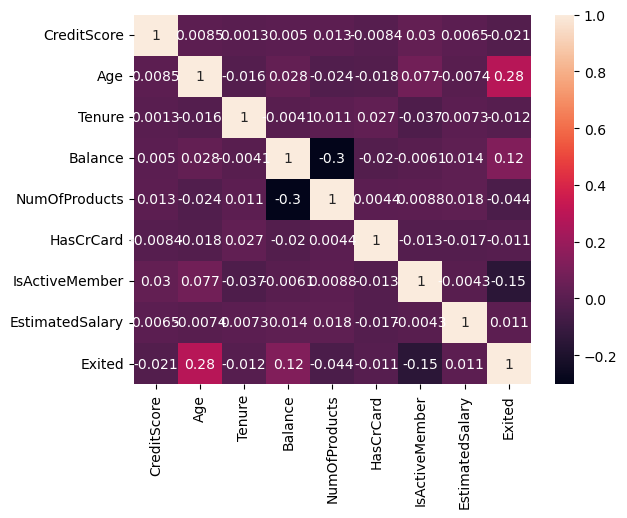

In [19]:
sns.heatmap(train_df.corr(), annot=True)

In [20]:
#the highest correlation can be seen for the columns: EXITED and AGE (pos corr)
#followeed by EXITED and ISACTIVEMEMBER (negative corr)

In [24]:
#applying scaling and encoding on the data set (on training only):
train_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
cont_cols = ['CreditScore','Age','Balance']
dis_cols = ['Geography','Gender']

for i in dis_cols:
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])

In [29]:
#SPLITTING THE DATA BEFORE SCALING IT
Xtrain = train_df.iloc[:,:-2].values
Ytrain = train_df.iloc[:,-2].values
Xtest = test_df.iloc[:,:-2].values
Ytest = test_df.iloc[:,-2].values

In [30]:
Xtrain

array([[619.,   0.,   0., ...,   1.,   1.,   1.],
       [608.,   2.,   0., ...,   1.,   0.,   1.],
       [502.,   0.,   0., ...,   3.,   1.,   0.],
       ...,
       [795.,   0.,   0., ...,   1.,   1.,   1.],
       [678.,   2.,   0., ...,   2.,   1.,   1.],
       [589.,   0.,   1., ...,   1.,   1.,   0.]])

In [32]:
Ytrain

array([101348.88, 112542.58, 113931.57, ..., 183044.86, 159938.82,
        95483.48])

In [33]:
#now scaling the data before proceeding:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [34]:
Xtrain

array([[-0.32458355, -0.90932218, -1.09964577, ..., -0.91494271,
         0.64303168,  0.97088971],
       [-0.43810788,  1.50434349, -1.09964577, ..., -0.91494271,
        -1.55513334,  0.97088971],
       [-1.53206959, -0.90932218, -1.09964577, ...,  2.51541215,
         0.64303168, -1.0299831 ],
       ...,
       [ 1.4918057 , -0.90932218, -1.09964577, ..., -0.91494271,
         0.64303168,  0.97088971],
       [ 0.28431966,  1.50434349, -1.09964577, ...,  0.80023472,
         0.64303168,  0.97088971],
       [-0.63419536, -0.90932218,  0.90938376, ..., -0.91494271,
         0.64303168, -1.0299831 ]])

In [35]:
#data is now scaled

In [36]:
#LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [37]:
reg.fit(Xtrain, Ytrain)

LinearRegression()

In [38]:
Ypred_reg = reg.predict(Xtest)

In [39]:
#finding the training coefficients:

#the intercept:
reg.intercept_

100247.79690017086

In [40]:
#the coeffecients
reg.coef_

array([ 350.58997765,  201.59508473, -286.72008348, -439.25450123,
        422.4264307 , 1172.98488202, 1345.70020608, -952.19309688,
       -220.12900086])

In [44]:
from sklearn import metrics
#the accuracy score of the model:
metrics.r2_score(Ytest, Ypred_reg)

-0.001579581459036472

In [45]:
#the value is NEGATIVE!!! That means this is a very bad linear regression model for predicting the Estimated Salary

In [49]:
#creating a funtion which categorises number of people based on their estimated salaries:
#USING YPRED_REG for the estimated salary (the ones, our model predicted for Y_TEST)

def salary_category(array):
    low, med, high = 0,0,0
    for i in array:
        if i >= 100000:
            high += 1
        elif i>=50000 and i<=100000:
            med += 1
        else:
            low += 1
    
    print("---","Salary Classification","---")
    print("No of people with High Salaray:",high)
    print("No of people with Medium Salaray:",med)
    print("No of people with Low Salaray:",low)
    

salary_category(Ypred_reg)

--- Salary Classification ---
No of people with High Salaray: 917
No of people with Medium Salaray: 889
No of people with Low Salaray: 0


In [53]:
#creating a function to estimate salary:

#RowNumber - 15, CustomerId -
#23456789, Surname - Ohio, CreditScore - 608, 
#Geography - France, Gender - Male,
#Age - 44, Tenure - 1, Balance - 66769.16, 
#NumOfProducts - 0, HasCrCard - 1, and
#IsActiveMember-1.

#not including rownumber, customerid and surname 
#as we havent considered them before as well

value_arr = [608,'France', 'Male', 44, 1, 66769.16, 0, 1, 1]

def estimate_sal(value_arr):
    ans = reg.predict([value_arr])
    return ans

estimate_sal

<function __main__.estimate_sal(value_arr)>

In [54]:
#NOW LOGISTIC REGRESSION:

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [59]:
#xtrain and xtest will be the same but including 
#ESTIMATED SALARY now
#changing ytrain and ytest for EXITED :

Xtrain = train_df.iloc[:,:-1].values
Ytrain = train_df.iloc[:,-1].values
Xtest = test_df.iloc[:,:-1].values
Ytest = test_df.iloc[:,-1].values

In [60]:
Ytrain

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [61]:
logr.fit(Xtrain, Ytrain) #training the model

LogisticRegression()

In [62]:
Ypred_logr = logr.predict(Xtest) #the predictions on test data

In [63]:
#preparing the confusion matrix and checking:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, Ypred_logr)

array([[1419,   33],
       [ 330,   24]], dtype=int64)

<AxesSubplot:>

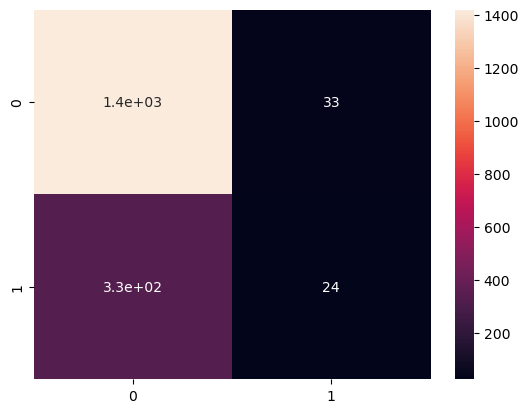

In [64]:
sns.heatmap(confusion_matrix(Ytest,Ypred_logr), annot = True)

In [65]:
#finding the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Ypred_logr)

0.7990033222591362

In [66]:
#finding the auc_roc
from sklearn.metrics import roc_auc_score
roc_auc_score(Ytest, Ypred_logr)

0.5225346687211094

In [67]:
#looking for the final classification report:
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ypred_logr))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1452
           1       0.42      0.07      0.12       354

    accuracy                           0.80      1806
   macro avg       0.62      0.52      0.50      1806
weighted avg       0.73      0.80      0.74      1806



In [69]:
"""
Test your function on the parameter values RowNumber - 25, CustomerId -
63445678, Surname - Lokal, CreditScore - 589, Geography - France, Gender -
Female, Age - 49, Tenure - 2, Balance - 34567.16, NumOfProducts - 1, HasCrCard -
0, IsActiveMember-1, Estimated Salary - 124345.65.

ignoring row, custid and surname
"""

value_arr = [589,'France', 'Female', 49, 2, 34567.16, 1, 0, 1, 124345.65]

def estimate_exit(value_arr):
    ans = logr.predict([value_arr])
    return ans

estimate_exit


<function __main__.estimate_exit(value_arr)>

In [70]:
#MOVING ON TO DECISION TREE MODEL:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [71]:
dtc.fit(Xtrain, Ytrain) #training the decision tree model

DecisionTreeClassifier()

In [72]:
Ypred_dt = dtc.predict(Xtest)
Ypred_dt

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [73]:
#ckecking the confusion matrix:
confusion_matrix(Ytest, Ypred_dt)

array([[1231,  221],
       [ 175,  179]], dtype=int64)

<AxesSubplot:>

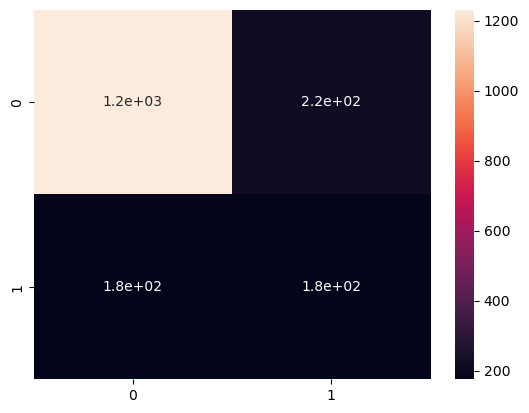

In [74]:
sns.heatmap(confusion_matrix(Ytest,Ypred_dt), annot = True)

In [75]:
#finding the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Ypred_dt)

0.7807308970099668

In [76]:
#finding the auc_roc
from sklearn.metrics import roc_auc_score
roc_auc_score(Ytest, Ypred_dt)

0.6767229303824064

In [77]:
#looking for the final classification report:
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ypred_dt))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1452
           1       0.45      0.51      0.47       354

    accuracy                           0.78      1806
   macro avg       0.66      0.68      0.67      1806
weighted avg       0.79      0.78      0.79      1806



In [78]:
#TRAINING THE DATA FOR RANDOM FOREST:

n_est = [10,20,30,40,50,60,70,80,90,100]
max_feat = ['sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,40,num=12)]
min_samples_split = [6,10,15,20]
min_samples_leaf = [5,10,12]
criterion = ['entropy','gini']

In [79]:
#creating the grid:
random_grid={
    'n_estimators' : n_est,
    'max_features' : max_feat,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' : criterion
}

In [80]:
#importing the model:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [81]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=20,cv=5,n_jobs=-1)

In [82]:
rscv.fit(Xtrain, Ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 12, 15, 18, 20, 23,
                                                      26, 29, 31, 34, 37, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 12],
                                        'min_samples_split': [6, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [83]:
rscv.best_params_

{'n_estimators': 30,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'gini'}

In [84]:
randomfc = RandomForestClassifier(n_estimators = 30, min_samples_leaf=10, min_samples_split=20, max_features='log2', max_depth=29, criterion= 'gini')

In [85]:
#modelling:
randomfc.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=29, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=30)

In [86]:
Ypred_rf = randomfc.predict(Xtest)

In [87]:
#analysing:
confusion_matrix(Ytest, Ypred_rf)

array([[1401,   51],
       [ 207,  147]], dtype=int64)

<AxesSubplot:>

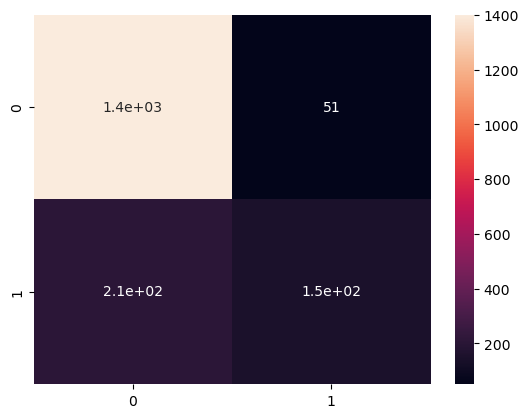

In [88]:
sns.heatmap(confusion_matrix(Ytest,Ypred_rf), annot = True)

In [89]:
#finding the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Ypred_rf)

0.8571428571428571

In [90]:
#finding the auc_roc
from sklearn.metrics import roc_auc_score
roc_auc_score(Ytest, Ypred_rf)

0.6900651351729934

In [91]:
#looking for the final classification report:
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ypred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1452
           1       0.74      0.42      0.53       354

    accuracy                           0.86      1806
   macro avg       0.81      0.69      0.72      1806
weighted avg       0.85      0.86      0.84      1806



In [93]:
#now comparing which values were predicted same by
#both random forst and decision tree:

test_array = (Ypred_dt == Ypred_rf)

In [94]:
count = 0
for i in test_array:
    if i:
        count += 1

print("The number of same values predicted is", count)

The number of same values predicted is 1510


In [99]:
#predicting for various threshholds:

th_list = [0.4, 0.5, 0.6, 0.7, 0.75]

def custom_predict(X, threshold):
    probs = logr.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    
for i in th_list: 
    new_preds = custom_predict(X=Xtest, threshold=i)
    print(new_preds)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [101]:
new_df = train_df.drop(columns=['EstimatedSalary','Exited'])

In [102]:
new_df = sc.fit_transform(new_df)

In [103]:
new_df

array([[-0.32458355, -0.90932218, -1.09964577, ..., -0.91494271,
         0.64303168,  0.97088971],
       [-0.43810788,  1.50434349, -1.09964577, ..., -0.91494271,
        -1.55513334,  0.97088971],
       [-1.53206959, -0.90932218, -1.09964577, ...,  2.51541215,
         0.64303168, -1.0299831 ],
       ...,
       [ 1.4918057 , -0.90932218, -1.09964577, ..., -0.91494271,
         0.64303168,  0.97088971],
       [ 0.28431966,  1.50434349, -1.09964577, ...,  0.80023472,
         0.64303168,  0.97088971],
       [-0.63419536, -0.90932218,  0.90938376, ..., -0.91494271,
         0.64303168, -1.0299831 ]])

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_compo = pca.fit_transform(new_df)
pca.explained_variance_ratio_

array([0.14621456, 0.12355932])

In [106]:
new_df.shape

(8194, 9)

In [108]:
pca_df = pd.DataFrame(data = principal_compo, columns = ['PC1','PC2'])

In [110]:
final = pd.concat([pca_df, train_df.reset_index()[['EstimatedSalary','Exited']]], axis= 1)

In [111]:
final

,PC1,PC2,EstimatedSalary,Exited
0,0.379249,0.898163,101348.88,1
1,-1.030512,1.782573,112542.58,0
2,1.030670,-1.068344,113931.57,1
3,1.454030,0.635026,93826.63,0
4,-1.352463,1.769567,79084.10,0
...,...,...,...,...
8189,1.174462,2.275331,49054.10,0
8190,0.977279,2.150727,80593.49,1
8191,-0.730841,1.142175,183044.86,0
8192,1.078982,1.903307,159938.82,0


In [1]:
#Hence after multiple model analysis, we can compare the various models for best suitablility for the dataset.
#We can easily select the model which provides the most accuracy and deploy the same.